## EDA - CREDICT CARD FRAUD
### FIRST GLANCE
Firstly we need to import the necessary libraries and configure the Spark session. After that, we load our data set, in order to analyse it, and perform EDA.

In [28]:
# imports and configure spark session

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark.sql.functions as f
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .master("local") \
    .appName("xpto") \
    .getOrCreate()
sc = spark.sparkContext

In [29]:
# Load file
df = spark.read.csv('datasets/creditcard.csv', header=True, inferSchema=True, sep=",")

# Print Schema
df.printSchema()

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

It appears that the dataset has a total of 31 columns, in which 28 of them are components that are results of PCA. Columns V1-V28 are going to be more abstract, since we don't have a clear definition/description of what they represent.

In [30]:
# show 5
df.take(5)

[Row(Time=0.0, V1=-1.3598071336738, V2=-0.0727811733098497, V3=2.53634673796914, V4=1.37815522427443, V5=-0.338320769942518, V6=0.462387777762292, V7=0.239598554061257, V8=0.0986979012610507, V9=0.363786969611213, V10=0.0907941719789316, V11=-0.551599533260813, V12=-0.617800855762348, V13=-0.991389847235408, V14=-0.311169353699879, V15=1.46817697209427, V16=-0.470400525259478, V17=0.207971241929242, V18=0.0257905801985591, V19=0.403992960255733, V20=0.251412098239705, V21=-0.018306777944153, V22=0.277837575558899, V23=-0.110473910188767, V24=0.0669280749146731, V25=0.128539358273528, V26=-0.189114843888824, V27=0.133558376740387, V28=-0.0210530534538215, Amount=149.62, Class=0),
 Row(Time=0.0, V1=1.19185711131486, V2=0.26615071205963, V3=0.16648011335321, V4=0.448154078460911, V5=0.0600176492822243, V6=-0.0823608088155687, V7=-0.0788029833323113, V8=0.0851016549148104, V9=-0.255425128109186, V10=-0.166974414004614, V11=1.61272666105479, V12=1.06523531137287, V13=0.48909501589608, V14=-

In [31]:
# count
df.count()

284807

After performing the count, we conclude that we are going to be working with a dataset that has 284 807 rows.

In [32]:
# general description
df.describe().toPandas().T

,summary,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,count,284807,284807,284807,284807,284807,284807,284807,284807,284807,...,284807,284807,284807,284807,284807,284807,284807,284807,284807,284807
1,mean,94813.85957508067,3.742631994571313E-15,4.949726613980831E-16,-7.91956258236933E-15,2.6856258595857287E-15,-1.526431820311508E-15,1.8138353011232985E-15,-1.7451778029293708E-15,-2.0038409356599819E-16,...,1.7563546049609402E-16,8.127131762955624E-16,5.436715845356366E-16,4.448566794315273E-15,1.0921332270848029E-15,1.6902917215243414E-15,-3.656410950327776E-16,-1.1835435008429972E-16,88.34961925089794,0.001727485630620034
2,stddev,47488.145954566906,1.9586958038574895,1.6513085794769824,1.516255005177769,1.4158685749409246,1.3802467340314435,1.3322710897575698,1.237093598182658,1.1943529026692032,...,0.7345240143713148,0.7257015604409057,0.6244602955949896,0.6056470678271693,0.5212780705409409,0.4822270132610532,0.40363249496503223,0.33008326416025235,250.12010924018742,0.04152718963546536
3,min,0.0,-56.407509631329,-72.7157275629303,-48.3255893623954,-5.68317119816995,-113.743306711146,-26.1605059358433,-43.5572415712451,-73.2167184552674,...,-34.8303821448146,-10.933143697655,-44.8077352037913,-2.83662691870341,-10.2953970749851,-2.60455055280817,-22.5656793207827,-15.4300839055349,0.0,0
4,max,172792.0,2.45492999121121,22.0577289904909,9.38255843282114,16.8753440335975,34.8016658766686,73.3016255459646,120.589493945238,20.0072083651213,...,27.2028391573154,10.5030900899454,22.5284116897749,4.58454913689817,7.51958867870916,3.5173456116238,31.6121981061363,33.8478078188831,25691.16,1


The maximum amount of time (in seconds) recorded between transactions is 172792 seconds, which is equivalent to 2880 minutes, or approx. 48 hours.

### CHECKING MISSING VALUES

In [33]:
# check how many NaN and Null values there are in each column
df.select([f.count(f.when(f.isnan(c) | f.col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|Time| V1| V2| V3| V4| V5| V6| V7| V8| V9|V10|V11|V12|V13|V14|V15|V16|V17|V18|V19|V20|V21|V22|V23|V24|V25|V26|V27|V28|Amount|Class|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|     0|    0|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+



Above checked for missing values. Each column shows the amount of null or NaN values in each column. It appears that the dataset doesn't have missing values!

### HOW MANY ROWS IN THE DATASET REPRESENT CREDIT CARD FRAUD?

In [34]:
# "Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."
# Count of 1s (fraud) and 0s (not fraud)
df.groupBy('Class').count().show()

+-----+------+
|Class| count|
+-----+------+
|    1|   492|
|    0|284315|
+-----+------+



Here we can see that, out of the 284 807 rows of information available, 492 represent credit card fraud, which translates to approx. 17% of the records. With these results, it is safe to say that we have an unbalanced dataset.

### LET'S DO SOME VISUALIZATION

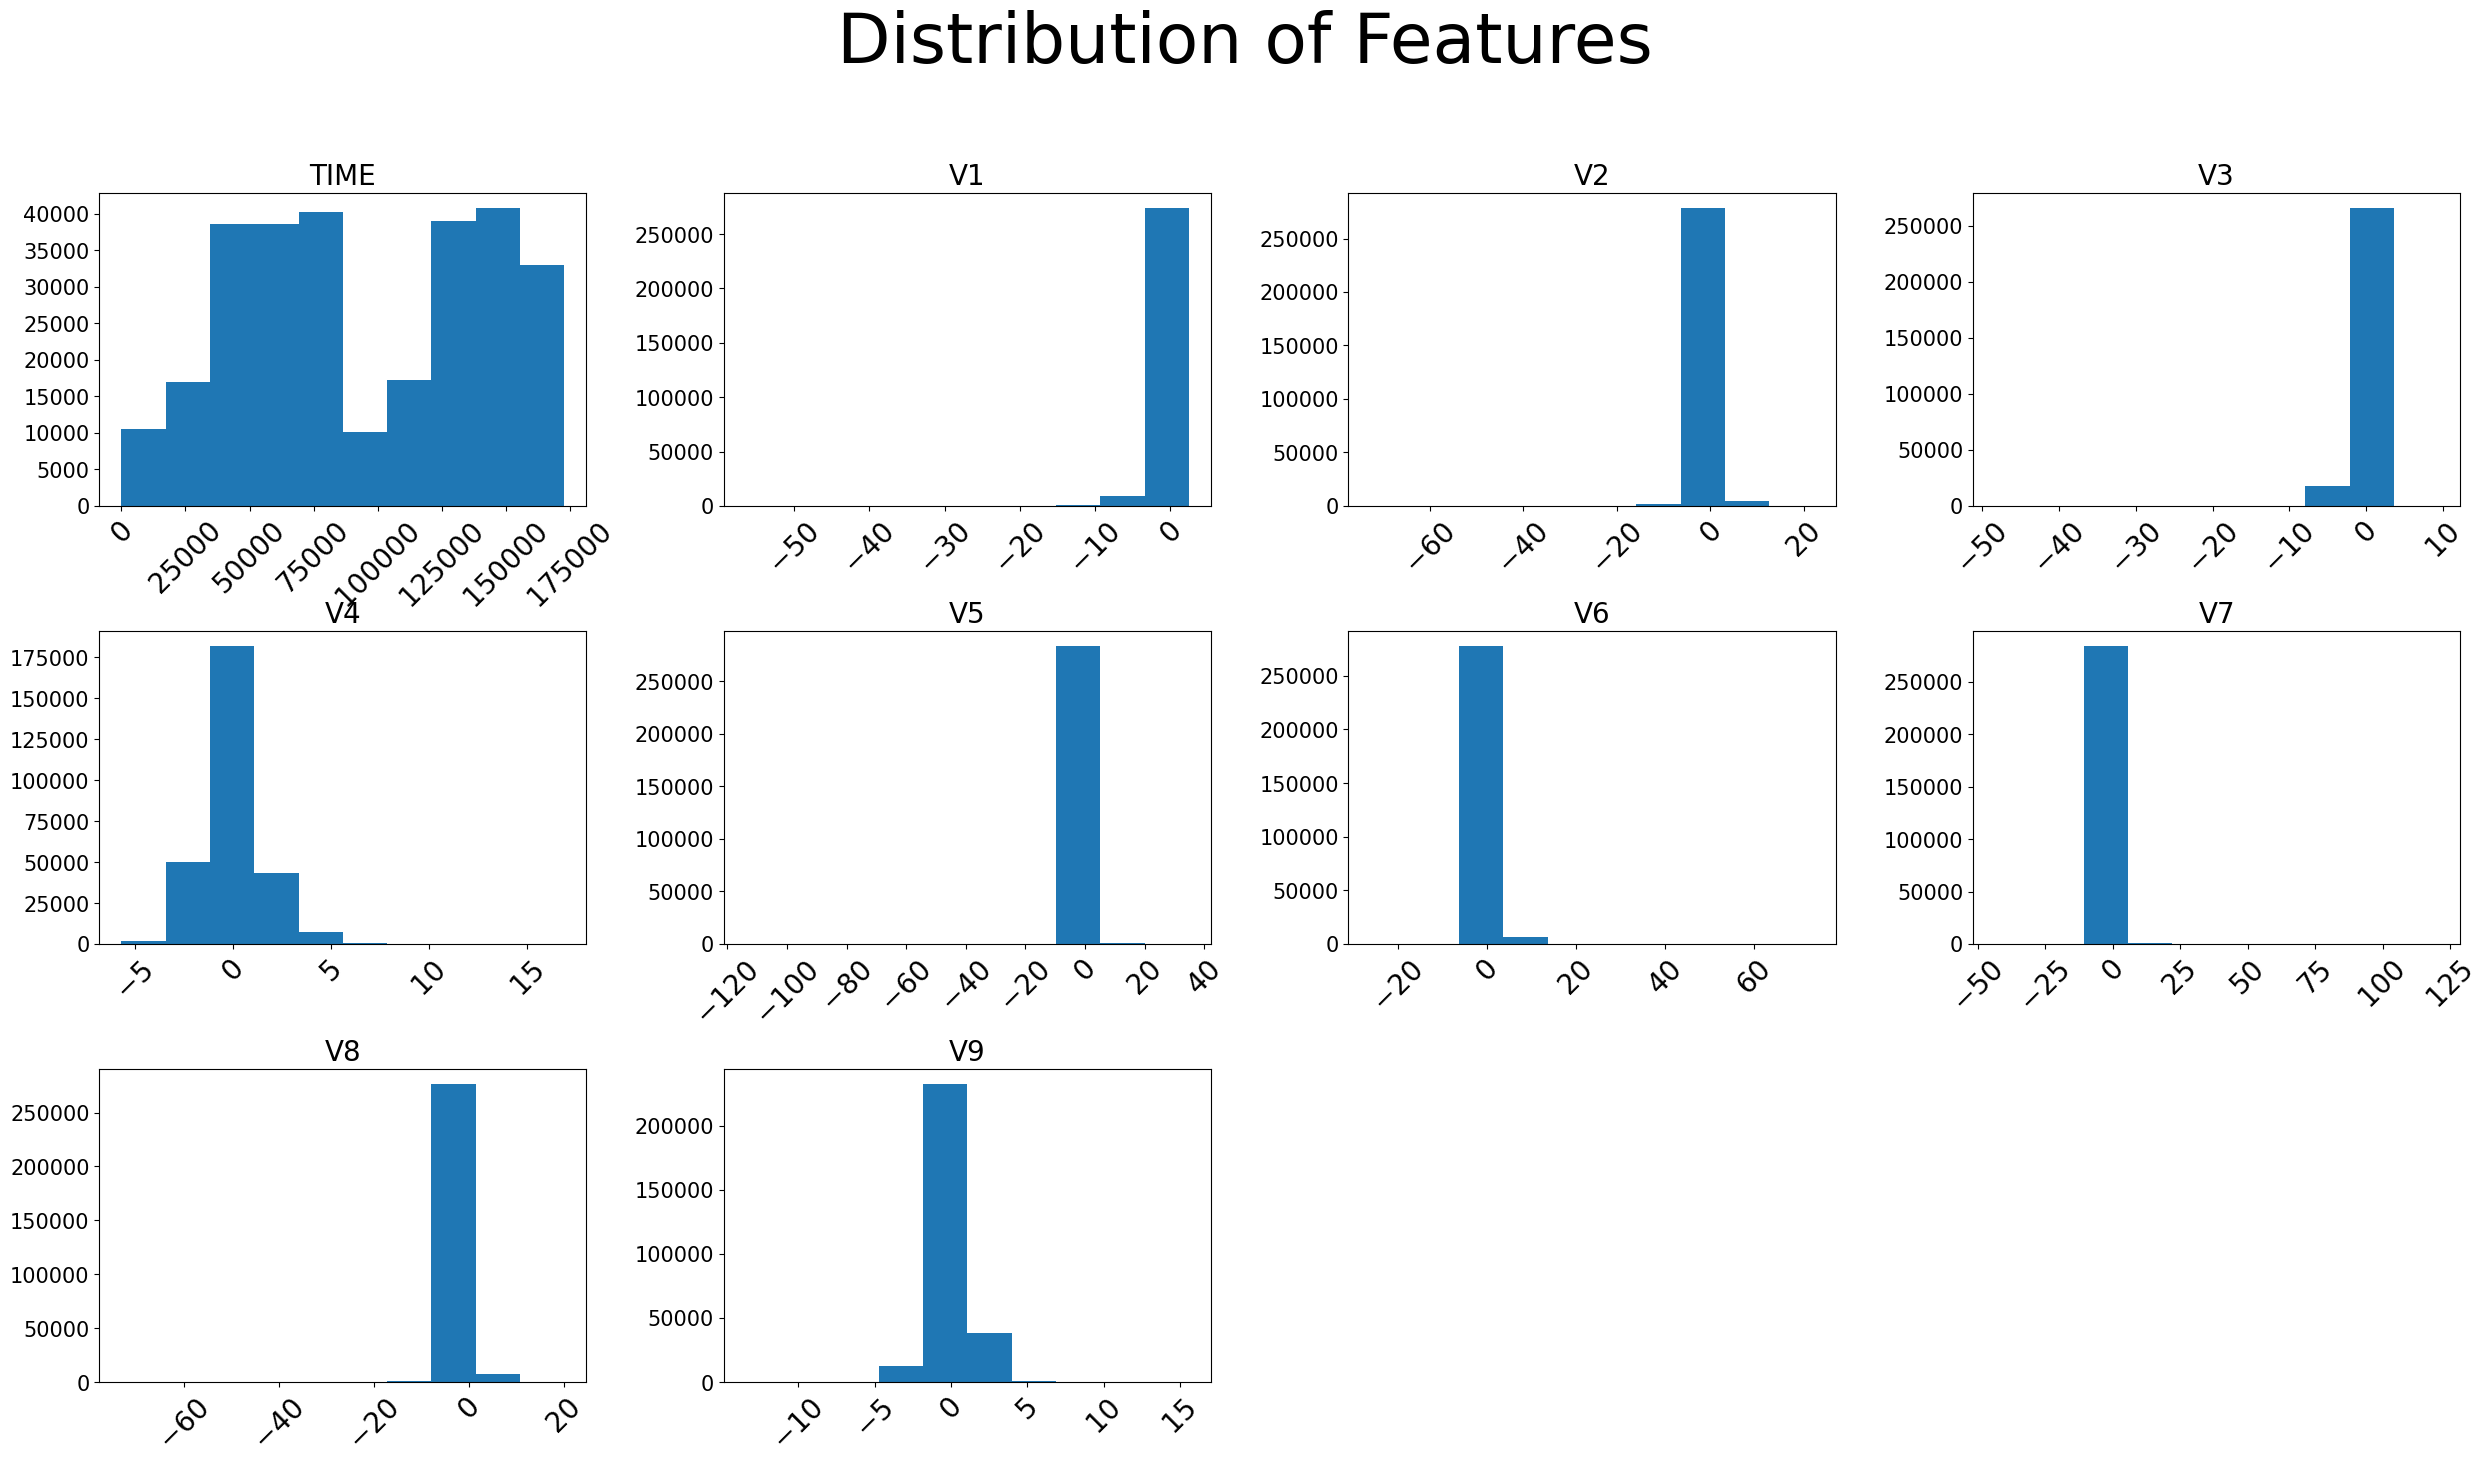

In [35]:
# create several histograms to show the distributions of the features
fig = plt.figure(figsize=(25, 15))
subtitle = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")
for col, num in zip(df.toPandas().describe().columns, range(1, 11)):
    ax = fig.add_subplot(3, 4, num)
    ax.hist(df.toPandas()[col])
    plt.grid(False)
    plt.xticks(rotation=45, fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(), fontsize=20)
plt.tight_layout()
subtitle.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

By analysing these plots, we conclude that Time does not have a normal distribution and the values 75 000-100 000 seconds are the ones with less occurences throughout the dataset. All of the Vx componentes are normalized, and with most occurences centered around the value 0. These feautures also show some negative values.

### USER DEFINED FUCTIONS

Firstly lets create YES or NO values to assign to the values in our "Class" column. If the values is 1, then we assign it a "yes", and if the value is 0, then we assign it a "no". After developing the function, we also create a column called "IsFraud". 

In [36]:
# create the yes/no function
y_udf = f.udf(lambda y: "no" if y == 0 else "yes", f.StringType())

In [37]:
# create the new column for the yes/no values
df = df.withColumn("IsFraud", y_udf('Class'))

df.show(5)

+----+------------------+-------------------+----------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------+-----+-------+
|Time|                V1|                 V2|              V3|                V4|                 V5|                 V6|                 V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|               V16|               V17|                V18|               V19|                V20|                 V21|                V

In [50]:
# create a function to group time values
def udf_multi(time):
    if(time < 50000):
        return "Under 50K s"
    elif(time >= 50000 and time <= 100000):
        return "Between 50K and 100K s"
    elif(time > 100000):
        return "Over 100K s"
    else: return "NA"

In [51]:
# apply the function to the "Time column"
time_udf = f.udf(udf_multi)
df = df.withColumn('time_udf', time_udf('Time'))

df.show(5)

+----+------------------+-------------------+----------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------+-----+-------+-----------+
|Time|                V1|                 V2|              V3|                V4|                 V5|                 V6|                 V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|               V16|               V17|                V18|               V19|                V20|                 V21|     

### APPLYING SOME STATISTICS

In [52]:
from pyspark.sql import Window 
window = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing) 

In [53]:
# lets create a table
time_group_table = df.select(["time_udf", "Amount"]).\
                         groupBy('time_udf').\
                            agg(
                                f.count("Amount").alias("UserCount"),
                                f.mean("Amount").alias("Amount_Avg"),
                                f.min("Amount").alias("Amount_Min"),
                                f.max("Amount").alias("Amount_Max")).\
                            withColumn("total", f.sum(f.col("UserCount")).over(window)).\
                            withColumn("Percent", f.col("UserCount")*100 / f.col("total")).\
                            drop(f.col("total")).sort(f.desc("Percent"))

In [54]:
time_group_table.toPandas()

23/04/22 17:34:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/04/22 17:34:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


23/04/22 17:34:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/04/22 17:34:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/04/22 17:34:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/04/22 17:34:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,time_udf,UserCount,Amount_Avg,Amount_Min,Amount_Max,Percent
0,Over 100K s,131048,88.129787,0.0,25691.16,46.012914
1,Between 50K and 100K s,91944,83.859063,0.0,18910.00,32.282914
2,Under 50K s,61815,95.494943,0.0,19656.53,21.704172


Here we computed some statistics with the "Amount" column, divided by the three time groups defined earlier. Now let's plot our results:

<Axes: xlabel='time_udf', ylabel='Percent'>

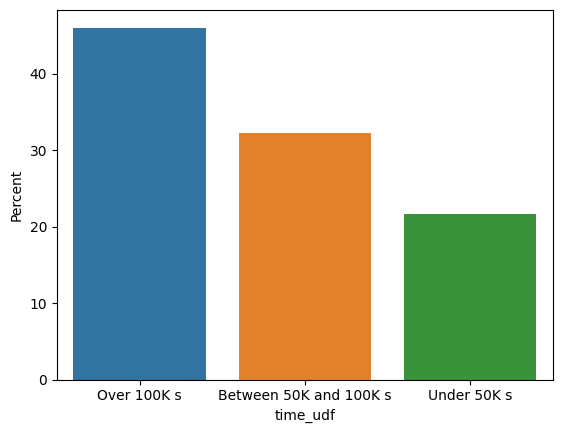

In [55]:
sns.barplot(x="time_udf", y="Percent", data=time_group_table.toPandas())

After analysing the graph, we conclude that the largest percentage for the Amount values is found when the time between each transaction recorded is over 100 000 seconds. 

Now we move on and try to do some correlation:

In [56]:
df.printSchema()

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

In [59]:
# create a dataframe with only numeric features in order to simplify our correlactions
numeric_features = [t[0] for t in df.dtypes if t[1] != 'string']
numeric_features_df = df.select(numeric_features)
numeric_features_df.toPandas().head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
col_names = numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])

In [62]:
# import Statistics from mllib -> Pyspark and import Pandas
from pyspark.mllib.stat import Statistics
import pandas as pd

In [63]:
# create a correlation matrix
corr_matrix = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_matrix)
corr_df.index = col_names
corr_df.columns = col_names
round(corr_df, 2)

23/04/22 17:50:24 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/04/22 17:50:24 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,-0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,-0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,0.00,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


Since the dataset has a lot of information, it is best to do a heatmap, to facilitate visualization:

<Axes: >

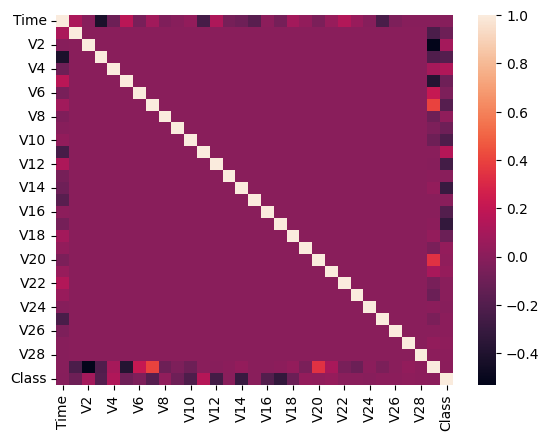

23/04/22 19:45:28 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 2090532 ms exceeds timeout 120000 ms
23/04/22 19:45:28 WARN SparkContext: Killing executors is not supported by current scheduler.
23/04/22 19:45:30 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:103)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:87)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:643)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1057)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:238)
	at s

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 55259)
Traceback (most recent call last):
  File "/opt/anaconda3/envs/code/lib/python3.10/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/anaconda3/envs/code/lib/python3.10/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/opt/anaconda3/envs/code/lib/python3.10/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/anaconda3/envs/code/lib/python3.10/socketserver.py", line 747, in __init__
    self.handle()
  File "/opt/anaconda3/envs/code/lib/python3.10/site-packages/pyspark/accumulators.py", line 281, in handle
    poll(accum_updates)
  File "/opt/anaconda3/envs/code/lib/python3.10/site-packages/pyspark/accumulators.py", line 253, in poll
    if func():
  File "/opt/anaconda3/envs/code/lib/pyt

In [64]:
# create the heatmap
sns.heatmap(corr_df)

By looking at our correlation matrix, we arrived at the following conclusions:
- The variables that were a product of PCA are not correlated with each other;
- "Time" seems to be negatively correlated with all of the "Vx" variables;
- "Time" and "Class" seem to have no correlation;
- "Class" seem to be negatively correlated with some of the "Vx" variables, and not correlated at all with others.